# RAMP Challenge on Selectivity classification of higher education programs in France



# RAMP: Selectivity classification Challenge
*Hela Mhiri, Haythem Borchani , Mahdi Attia, Sami ElMokh from IPP/M2DS*

<div>
<table style="width:100%; background-color:white;">
  <tr style="background-color:white;">
    <td align="left"; style="background-color:white; width: 100%;">
        <a href="https://www.ip-paris.fr/">
            <img src="https://www.ip-paris.fr/voeux2022-telecomparis/images/logos_ecoles.png" width="1000px"/>
        </a>
    </td>
  </tr>
 </table>
</div>


## Table of Contents
* [Introduction](#introduction)
  * [Context](#context)
  * [Challenge Objective](#challenge-objective)
* [The dataset](#dataset)
* [Requirements](#Requirements)

* [Data exploration](#exploration)
  * [Data download](#download)
  * [Visualize data](#visualize)
* [Base Model](#Base)
* [Submitting on RAMP](#submitting)

## Introduction <a class="anchor" id="introduction"></a>

In today's rapidly evolving educational landscape, the competitiveness of educational programs plays a crucial role in shaping the academic and professional trajectories of students. Institutions offering programs ranging from undergraduate degrees to specialized courses often face the challenge of selecting candidates from a pool of applicants. Understanding the selectivity of these programs can provide valuable insights into their admission processes and overall reputation.

In this challenge, we aim to develop a machine learning model capable of predicting the selectivity of educational programs based on various factors . By leveraging historical data and advanced predictive modeling techniques, we seek to empower educational stakeholders with a tool that can aid in decision-making processes related to admissions and program management.
### Context <a class="anchor" id="context"></a>

In the quest for higher education, students often find themselves confronted with a myriad of options, each offering unique opportunities and pathways towards their academic and career aspirations. However, navigating through this plethora of choices can be daunting, particularly when it comes to assessing the selectivity and competitiveness of various educational programs.
To aid students in making well-informed decisions, educational institutions and policymakers have recognized the importance of providing transparent and comparative information about program selectivity. By leveraging predictive models developed through machine learning and data analysis, institutions can conduct comparative analyses of different programs to determine their relative levels of selectivity.

### Challenge Objective <a class="anchor" id="challenge-objective"></a>

The objective of this challenge is to develop a predictive model capable of determining the selectivity of educational programs. By leveraging machine learning techniques and analyzing relevant data, participants are tasked with creating a model that can accurately classify whether a particular educational program is non-selective,peu selective,tres selective.

## The dataset <a class="anchor" id="dataset"></a>
The description of all the columns of the dataset is available from the [gov site](https://www.data.gouv.fr/fr/datasets/parcoursup-2023-voeux-de-poursuite-detudes-et-de-reorientation-dans-lenseignement-superieur-et-reponses-des-etablissements/#/resources)

For this challenge, the data were first preprocessed and split in order to preserve a private test set on which to evaluate the models on our servers. This leaves 6220 observations in the public train set and 839 observations in the public test set. 
Observations are grouped in samples (with a SampleID each) and we are very cautious to keep those observations from the same sample either in the train set or in the test set (both during splitting (see point 4. of preprocess) and cross-validation)..
Preprocessing steps before splitting the data:


## Requirements <a class="anchor" id="requirements"></a>

In [188]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedGroupKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


## Data exploration <a class="anchor" id="exploration"></a>

### Data download <a class="anchor" id="download"></a>


In [179]:
df = pd.read_csv('./data/train.csv', sep=',')

### Visualize data <a class="anchor" id="visualize"></a>

In [180]:
df.head()

,session,contrat_etab,cod_uai,g_ea_lib_vx,dep,dep_lib,region_etab_aff,acad_mies,ville_etab,lib_for_voe_ins,...,tri,cod_aff_form,detail_forma2,lien_form_psup,taux_acces_ens,part_acces_gen,part_acces_tec,part_acces_pro,etablissement_id_paysage,composante_id_paysage
0,2023,Public,0910620E,Lycée Robert Doisneau,91,Essonne,Ile-de-France,Versailles,Corbeil-Essonnes,BTS - Production - Electrotechnique,...,2_Lycées,10843,NaN,https://dossier.parcoursup.fr/Candidats/public...,43.0,6.0,33.0,61.0,NaN,NaN
1,2023,Public,0134015U,Aix-Marseille Université - Site de Marseille S...,13,Bouches-du-Rhône,Provence Alpes Côte d'Azur,Aix-Marseille,Marseille,Licence - Chimie - Portail Louis Pasteur,...,1_universités,39168,NaN,https://dossier.parcoursup.fr/Candidats/public...,77.0,99.0,1.0,0.0,xJdyB,NaN
2,2023,Public,0782104N,ISTY Mantes-Vélizy,78,Yvelines,Ile-de-France,Versailles,Mantes-la-Ville,Formation d'ingénieur Bac + 5 - Bac général,...,3_Autres formations,34,Concours Geipi Polytech,https://dossier.parcoursup.fr/Candidats/public...,73.0,100.0,0.0,0.0,NaN,NaN
3,2023,Public,0333298F,Université de Bordeaux - Bordeaux Métropole,33,Gironde,Nouvelle-Aquitaine,Bordeaux,Bordeaux,Licence - Parcours d'Accès Spécifique Santé (P...,...,1_universités,26838,NaN,https://dossier.parcoursup.fr/Candidats/public...,38.0,98.0,1.0,1.0,90I54,NaN
4,2023,Public,0561992L,Université de Rennes 1 - Antenne de Vannes,56,Morbihan,Bretagne,Rennes,Vannes,Licence - Parcours d'Accès Spécifique Santé (P...,...,1_universités,35846,NaN,https://dossier.parcoursup.fr/Candidats/public...,63.0,89.0,6.0,4.0,91D9w,NaN


In [184]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Columns: 118 entries, session to composante_id_paysage
dtypes: float64(45), int64(48), object(25)
memory usage: 7.0+ MB


In [185]:
df.describe()

,session,capa_fin,voe_tot,voe_tot_f,nb_voe_pp,nb_voe_pp_internat,nb_voe_pp_bg,nb_voe_pp_bg_brs,nb_voe_pp_bt,nb_voe_pp_bt_brs,nb_voe_pp_bp,nb_voe_pp_bp_brs,nb_voe_pp_at,nb_voe_pc,nb_voe_pc_bg,nb_voe_pc_bt,nb_voe_pc_bp,nb_voe_pc_at,nb_cla_pp,nb_cla_pc,nb_cla_pp_internat,nb_cla_pp_pasinternat,nb_cla_pp_bg,nb_cla_pp_bg_brs,nb_cla_pp_bt,nb_cla_pp_bt_brs,nb_cla_pp_bp,nb_cla_pp_bp_brs,nb_cla_pp_at,prop_tot,acc_tot,acc_tot_f,acc_pp,acc_pc,acc_debutpp,acc_datebac,acc_finpp,acc_internat,acc_brs,acc_neobac,acc_bg,acc_bt,acc_bp,acc_at,acc_mention_nonrenseignee,acc_sansmention,acc_ab,acc_b,acc_tb,acc_tbf,acc_bg_mention,acc_bt_mention,acc_bp_mention,acc_term,acc_term_f,acc_aca_orig,acc_aca_orig_idf,pct_acc_debutpp,pct_acc_datebac,pct_acc_finpp,pct_f,pct_aca_orig,pct_aca_orig_idf,pct_etab_orig,pct_bours,pct_neobac,pct_mention_nonrenseignee,pct_sansmention,pct_ab,pct_b,pct_tb,pct_tbf,pct_bg,pct_bg_mention,pct_bt,pct_bt_mention,pct_bp,pct_bp_mention,prop_tot_bg,prop_tot_bg_brs,prop_tot_bt,prop_tot_bt_brs,prop_tot_bp,prop_tot_bp_brs,prop_tot_at,ran_grp1,ran_grp2,ran_grp3,cod_aff_form,taux_acces_ens,part_acces_gen,part_acces_tec,part_acces_pro
count,7767.0,7767.000000,7767.000000,7767.000000,7767.000000,544.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,544.000000,544.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,544.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,3562.000000,3562.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7609.000000,3503.000000,2191.000000,7767.000000,7698.000000,7767.000000,7767.000000,7767.000000
mean,2023.0,55.330243,869.187202,486.074675,844.312090,541.693015,448.233295,70.177804,115.980044,36.439423,53.705549,22.682632,226.393202,24.875113,4.857216,3.304236,2.520922,14.192739,607.561221,11.525814,321.632353,571.569853,359.521952,56.242436,81.969873,23.636668,36.899189,14.690099,129.170207,289.141882,45.867903,25.684177,41.562251,4.132741,14.140595,39.188490,39.841380,11.409926,8.101841,34.101841,23.665894,6.576928,3.859019,11.764774,0.063602,10.578216,10.999614,8.057551,3.839063,0.563796,17.414832,3.438393,2.606798,3.796182,1.411005,23.250161,25.883481,30.082014,83.994979,85.563409,49.962019,67.401957,73.049955,10.590189,25.877559,73.466847,0.228917,36.542552,31.638985,20.392301,8.428351,0.933565,50.666667,35.065662,25.151796,11.873310,22.368482,14.468392,174.158105,28.095146,38.302948,11.295867,18.144071,7.299086,58.536758,558.264029,76.052241,82.716568,16598.813055,60.726293,57.417922,24.633449,17.057551
std,0.0,104.163726,1341.961382,873.111458,1343.077237,699.258402,975.759396,145.703445,207.581559,73.272511,104.017066,48.462036,402.330809,57.109580,15.586907,11.199420,7.574035,33.285776,1099.993932,33.170752,425.314843,499.178971,810.775123,132.525345,141.128260,44.196647,69.703105,29.975106,298.831386,449.275925,78.582427,52.669630,74.026159,13.430145,33.939651,69.125793,70.012641,14.800552,14.806567,61.900307,57.416481,10.455514,5.276230,25.606155,0.337115,20.629309,22.487342,19.138937,13.554028,4.747421,46.179089,7.369487,3.948698,4.287742,2.251293,45.454464,51.323518,24.838025,17.101667,16.426553,29.453844,29.253594,26.735792,19.272817,19.431445,22.215939,1.836582,26.243010,18.291801,17.683709,15.046797,4.501920,37.588591,35.028215,23.789634,16.872465,27.688523,19.859272,358.632779,55.221061,60.

In [ ]:
df.select_dtypes(include=['object']).nunique()

### target variable 

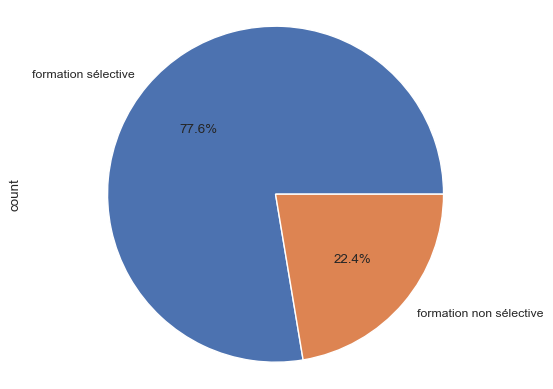

In [164]:
df['select_form'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()



We can see here from the pie plot that we are facing an unbalanced dataset where the percentage of "formation non selective" is 22.4%, for the formation "peu selective" is equal to [insert percentage here], and for the formation [insert formation name] is equal to [insert percentage here].


<Axes: >

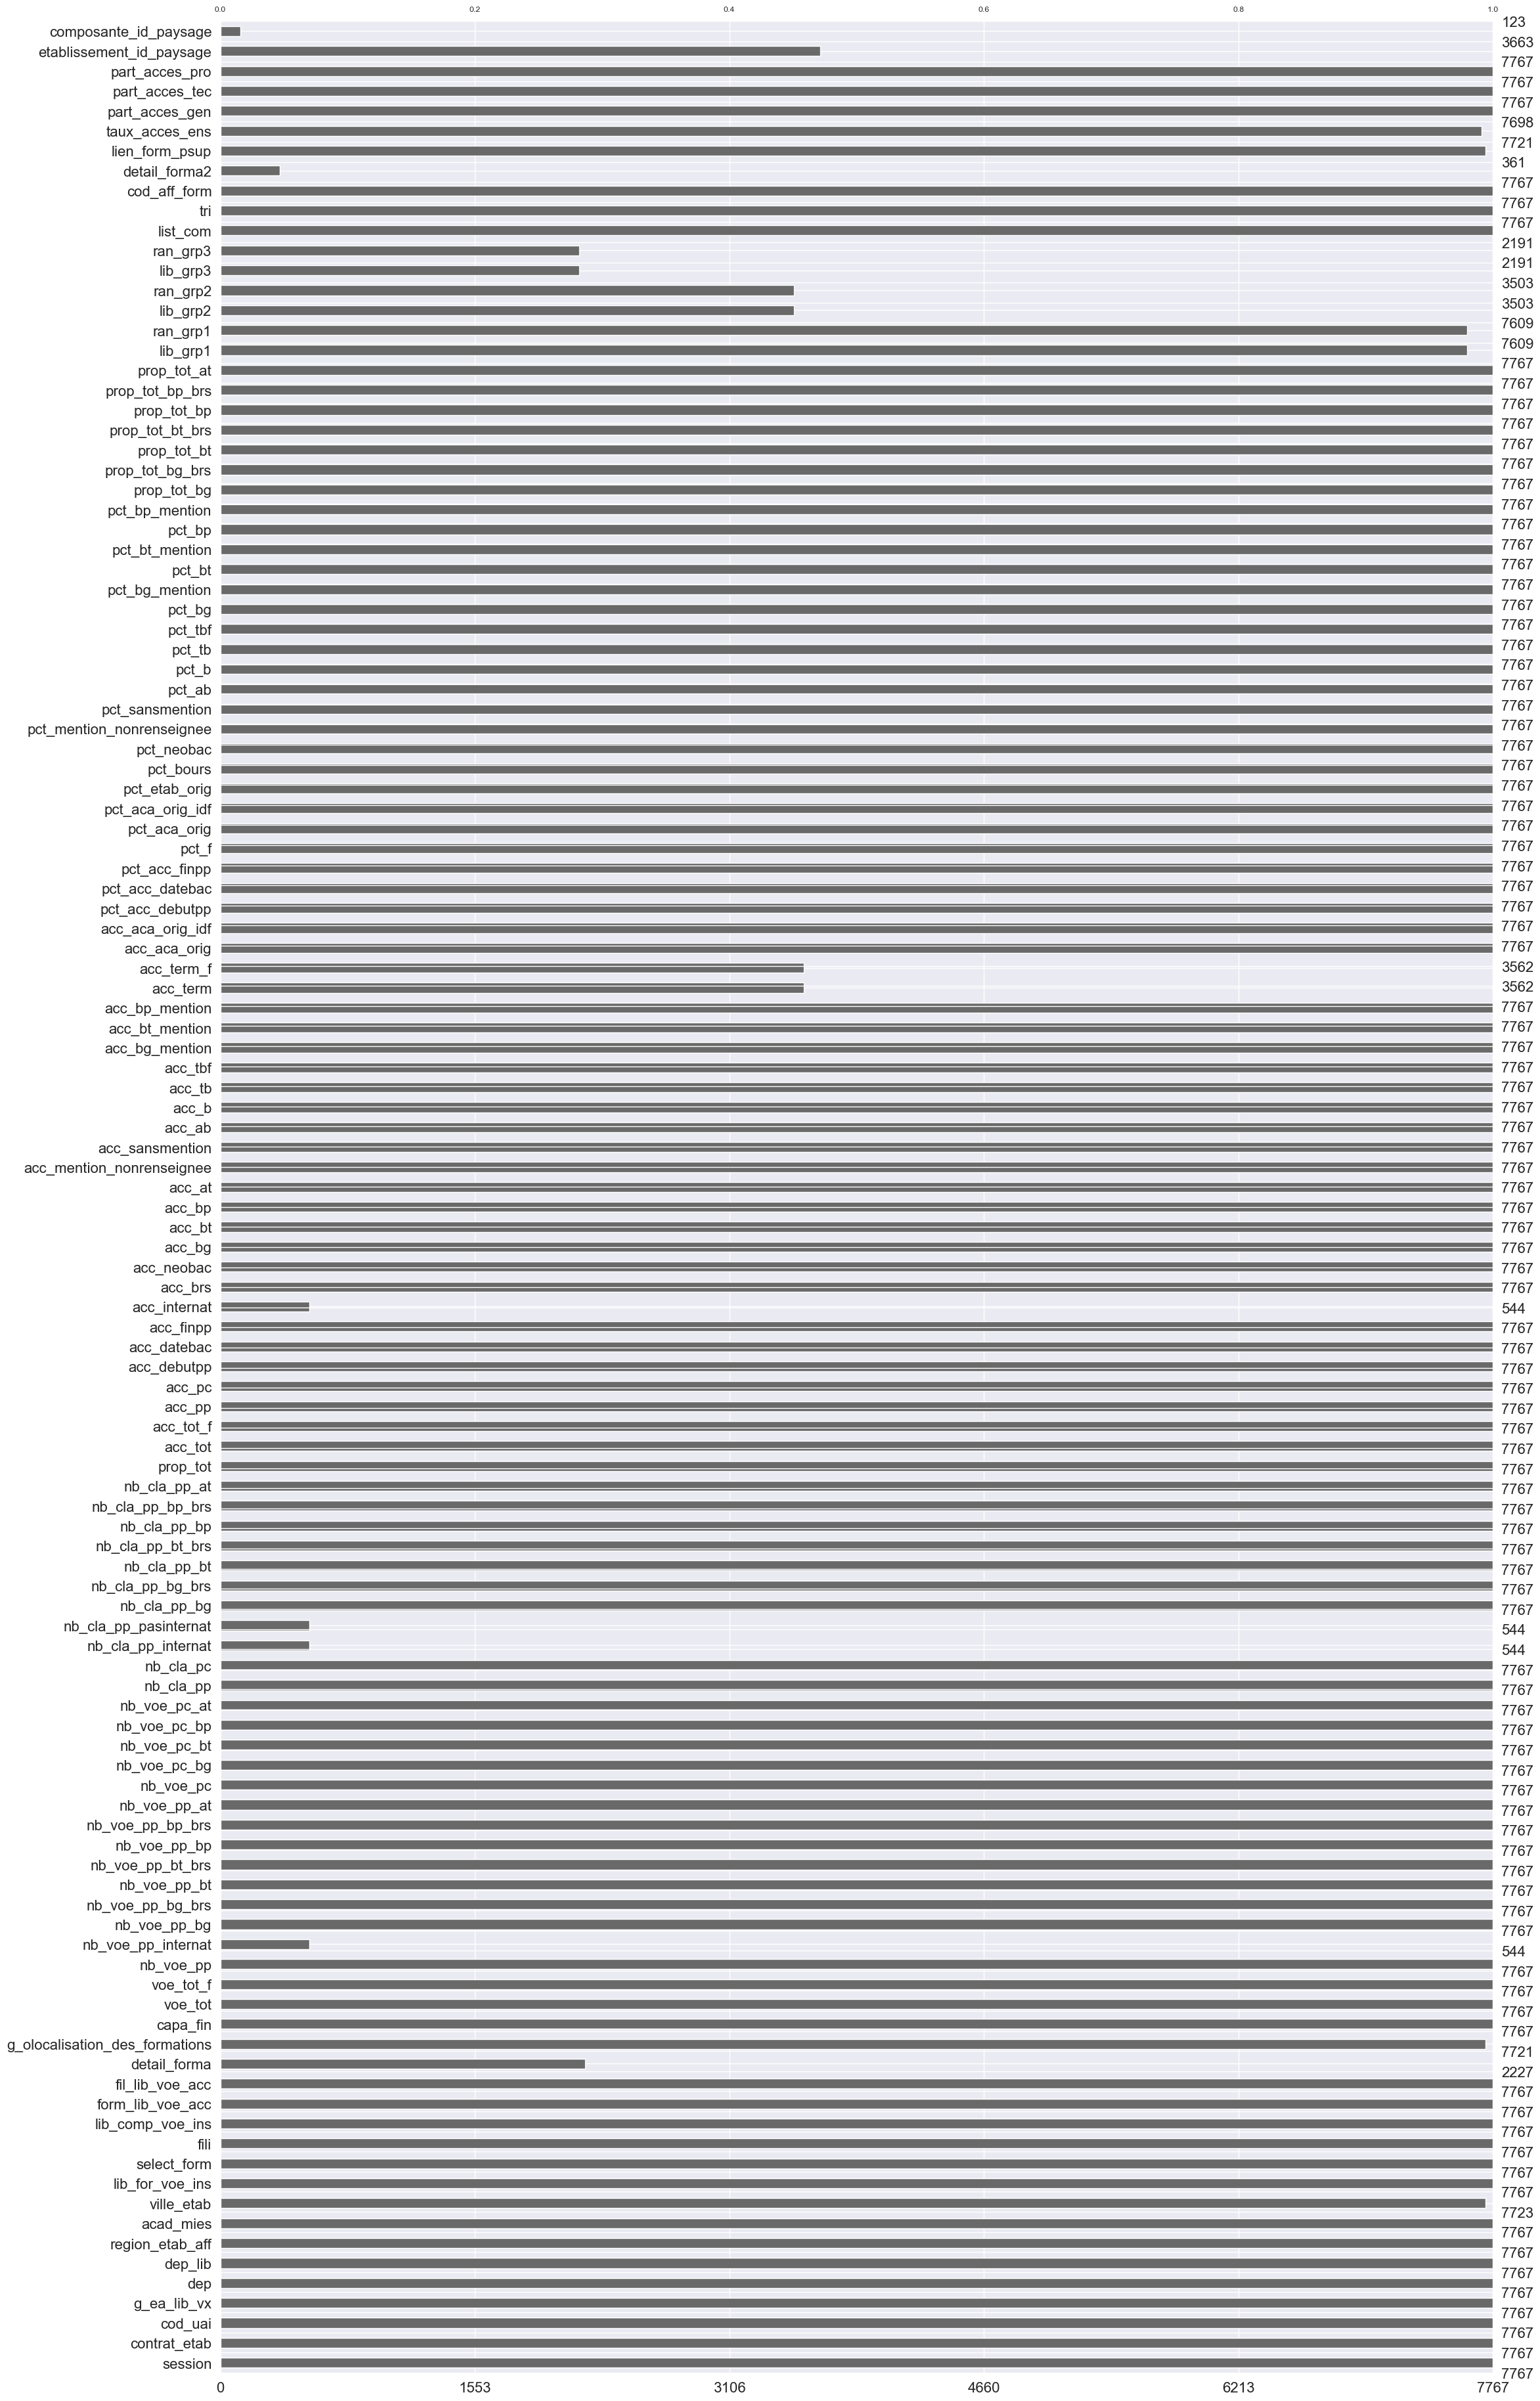

In [168]:
import missingno as msno
msno.bar(df)

/var/folders/cj/9t_94sk95dl2n0zqlvn_4ws40000gn/T/ipykernel_31086/1435311389.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='select_form', ax=axes[i])


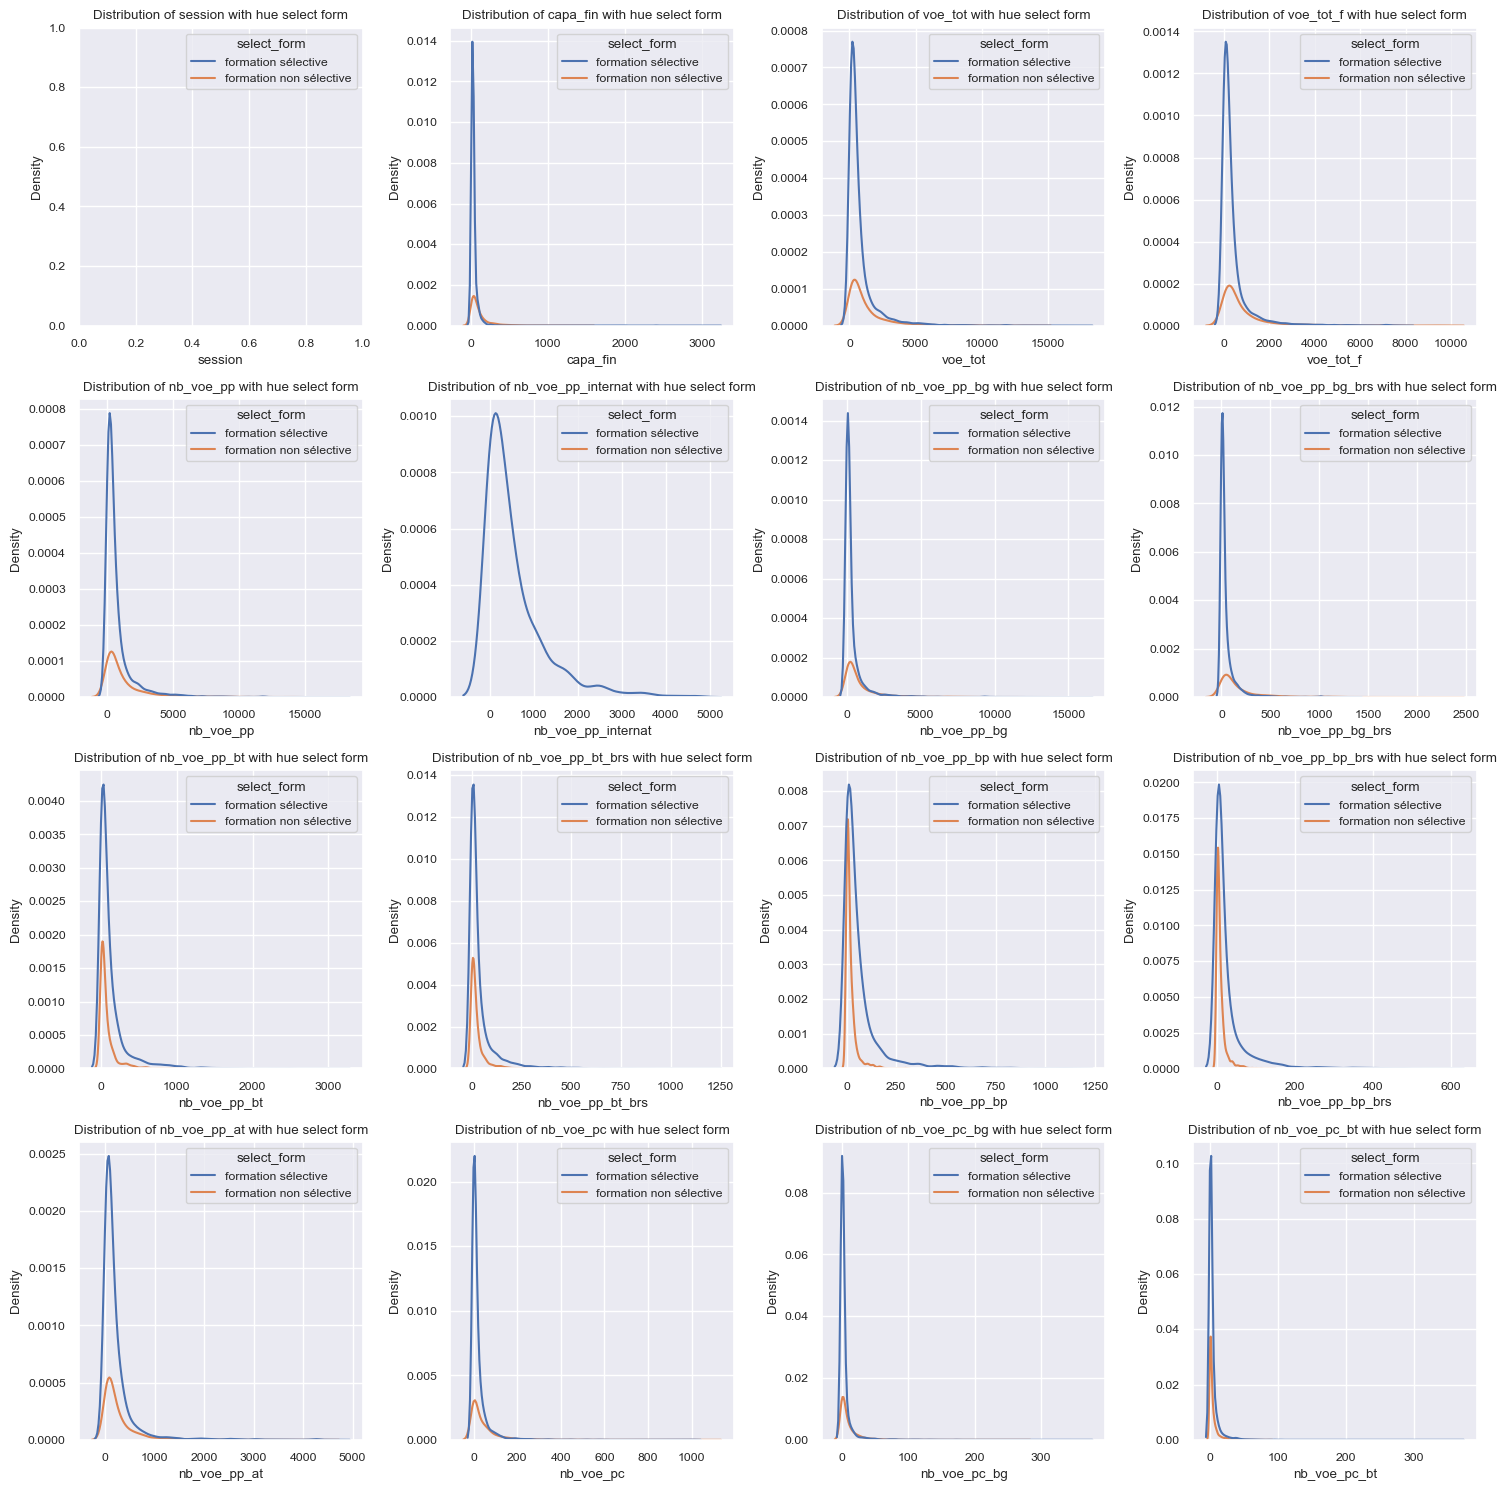

In [172]:

import seaborn as sns
import seaborn as sns

# Select the numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Plot the distribution for each numerical variable
import matplotlib.pyplot as plt
# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Plot the distribution for each numerical variable
for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.kdeplot(data=df, x=col, hue='select_form', ax=axes[i])
        axes[i].set_title(f'Distribution of {col} with hue select form')

# Remove empty subplots
if len(numerical_cols) < num_rows * num_cols:
    for j in range(len(numerical_cols), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

# Show the plot
import matplotlib.pyplot as plt

# Define the categorical variables to plot
categorical_cols = ['col1', 'col2', 'col3']

# Calculate the number of rows and columns for subplots
num_rows = len(categorical_cols)
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over the categorical variables
for i, col in enumerate(categorical_cols):
    # Plot the countplot for each categorical variable
    sns.countplot(x=col, data=df, ax=axes[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [48]:
df['select_form'] = df['select_form'].map({'formation sélective': 1, 'formation non sélective': 0})

In [49]:
#number of numerical columns
num_cols = df._get_numeric_data().columns

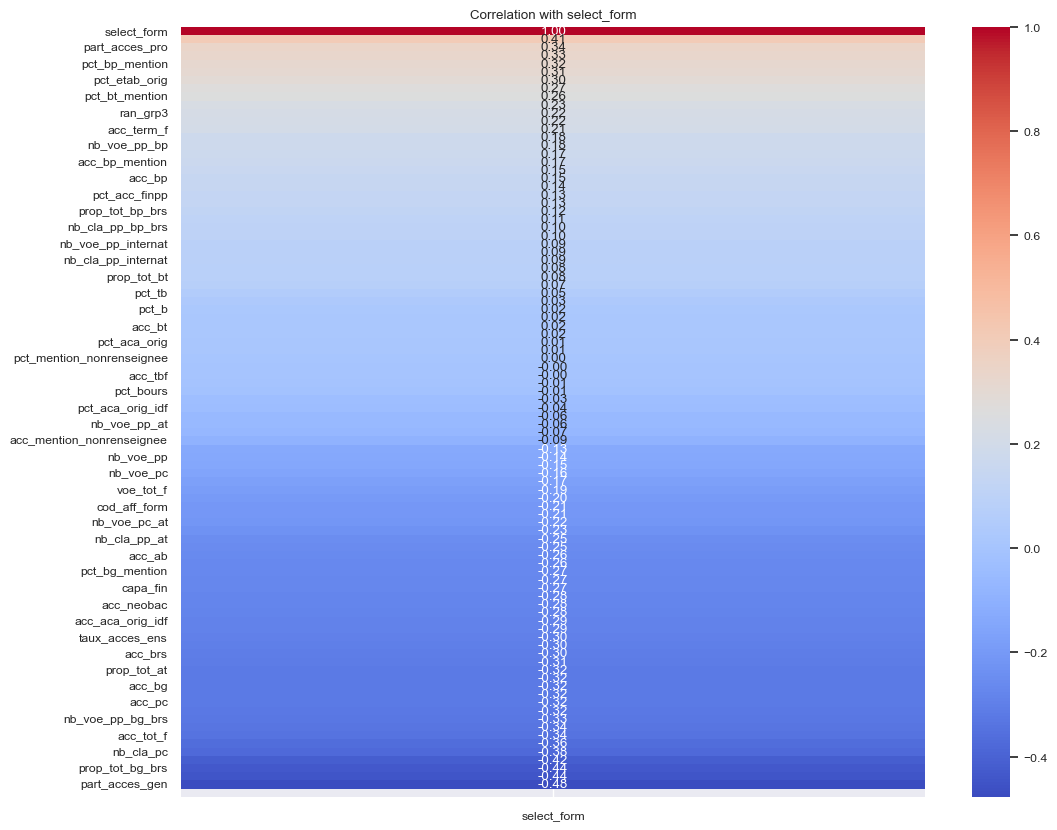

In [55]:
correlation = df[num_cols].corr()
correlation.columns
#plot the coorelation with select_form
correlation_select_form = correlation['select_form'].sort_values(ascending=False)
pd.set_option('display.max_rows', None)
sns.set(font_scale=0.8)  # Adjust the font size of the annotations

plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap

sns.heatmap(correlation_select_form.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with select_form')
plt.show()


In [154]:
X=df.drop(columns=['select_form'])
y=df['select_form']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)




0.7746753246753246

Scalling data 

In [187]:
# Selecting categorical and numerical fetaures
cat_cols = df.drop('select form', axis=1).select_dtypes(['object', 'bool']).columns.tolist()
num_cols = df.drop('select form', axis=1).select_dtypes('number').columns.tolist()

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

## Base Model <a class="anchor" id="Base Model"></a>

This section will showcase a base model, and the objective of this challenge is to surpass the score achieved by this dummy model.

In [ ]:
clf = Pipeline(
    steps=[("transformer", preprocessor), ("classifier",RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0))]
)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)

In [ ]:

# Predicting on test data
y_pred = pipeline.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
print('The test accuracy is : ', accuracy)
print('The test balanced accuracy is : ', balanced_accuracy)
print(report)

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=pipeline[1].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline[1].classes_)
disp.plot()
plt.show()

As previously mentioned, the dataset exhibits significant imbalance in the target class, which notably impacts the model's balanced accuracy. This imbalance is evident from the remarquable discrepancy observed between the accuracy score (0.89) and the balanced accuracy score (0.69), highlighting the need for strategies to address this imbalance for more reliable model performance (such as using balancing techniques like SMNOTE, or specifying the class_weight='balanced' in the model,...).



## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event [tephra](http://www.ramp.studio/events/tephra_datacamp2023). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/tephra_datacamp2023/sandbox) and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `classifier.py` and upload this file directly. You can check the starting-kit ([`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/tephra_datacamp2023/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/tephra_datacamp2023/leaderboard)) is the balenced accuracy score (`bal_acc`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


class Classifier(BaseEstimator):
    def __init__(self):
        self.transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]
        )
        self.model = LogisticRegression(max_iter=500)
        self.pipe = make_pipeline(self.transformer, self.model)

    def fit(self, X, y):
        X = X.drop(["groups"], axis=1)
        self.pipe.fit(X, y)

    def predict(self, X):
        X = X.drop(["groups"], axis=1)
        return self.pipe.predict(X)

    def predict_proba(self, X):
        X = X.drop(["groups"], axis=1)
        return self.pipe.predict_proba(X)

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>. Here is an example with the starting_kit submission:



In [ ]:
!ramp-test --submission starting_kit